# COM2004/3004 - Analysing data with Pandas

*Copyright &copy; 2023 University of Sheffield. All rights reserved*.

## Objectives

* To learn how to use python `pandas` to handle a large real dataset.
* To see how questions can be answered using a few lines of python code.
* To see some examples of how data can be visualised using `matplotlib`.

## Introduction


This notebook uses the `footballdata` python module which accesses data from a number of football data websites. The data includes match results from recent years for all major leagues across Europe and elsewhere.

The module will not be installed in your python distribution so before it can be imported you will need to install it by using `pip` in the linux shell. This can be done from inside the notebook by execute the cell below


In [1]:
%pip install numpy pandas
import numpy as np
import pandas as pd

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/89/c8/466196b756d74326820fe227743105fda0198a133f18916610e068540f0f/pandas-2.1.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     --------------------- ---------------- 194.6/341.8 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.5 MB 9.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.5 MB 9.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.5 MB 8.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/

In this lab we will be using Pandas. Pandas is a module for data science, which provides powerful ways for manipulating and querying data stored in spreadsheet-like structures called `dataframe`s.

We will be using data from all games in the English Premier League from 2014 to the present. The data is loaded below and stored in the variable `games`.

In [2]:
games = pd.read_csv('data/games.csv')

`games` is a pandas dataframe object. It is somewhat like a spreadsheet with the data for each game stored in a separate row. Each row consists of a number of headed columns. The available column names are stored in the list `games.columns`.

Execute the cell below to view them,

In [3]:
games.columns

Index(['league', 'season', 'game_id', 'date', 'home_team', 'away_team', 'FTHG',
       'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA',
       'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH',
       'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD',
       'PSCA'],
      dtype='object')

The column names have been given compact but rather cryptic names, e.g., 'HTHG' is the half-time home goals, 'HY' is the number of yellow cards for the home team, etc. The meaning of other headings can be found here https://www.football-data.co.uk/notes.txt

The data in `games` stores results of 1900 matches. For each match there are 67 different columns, i.e., 67 different items of data. If we print `games` we will be shown a small part of the complete dataset.

In [4]:
print(games)

                  league  season                                    game_id  \
0     ENG-Premier League    1415          2014-08-16 Arsenal-Crystal Palace   
1     ENG-Premier League    1415          2014-08-16 Leicester City-Everton   
2     ENG-Premier League    1415  2014-08-16 Manchester United-Swansea City   
3     ENG-Premier League    1415                   2014-08-16 QPR-Hull City   
4     ENG-Premier League    1415          2014-08-16 Stoke City-Aston Villa   
...                  ...     ...                                        ...   
1895  ENG-Premier League    1819                2019-05-12 Liverpool-Wolves   
1896  ENG-Premier League    1819       2019-05-12 Manchester United-Cardiff   
1897  ENG-Premier League    1819        2019-05-12 Southampton-Huddersfield   
1898  ENG-Premier League    1819       2019-05-12 Tottenham Hotspur-Everton   
1899  ENG-Premier League    1819         2019-05-12 Watford-West Ham United   

            date          home_team        away_tea

## Selecting a column

We can select a single column of data by indexing the dataframe with the column name. e.g. to retrieve the halftime home goals we would use

In [8]:
hthg = list(games["HTHG"])
# print(hthg)

## Selecting a subset of the games

Pandas provides an easy ways to filter the data. For example to select the games for which the 'home_team' is 'Liverpool' we would use

In [9]:
liverpool_games = games[games["home_team"] == "Liverpool"]

Putting this together we can retrieve the halftime home goals scored in all games by Liverpool

In [11]:
liverpool_games = games[games["home_team"] == "Liverpool"]
liverpool_hthg = list(liverpool_games["HTHG"])
print(liverpool_hthg)

[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 3, 0, 2, 3, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 3, 0, 1, 1, 0, 1, 1, 4, 0, 1, 2, 2, 2, 1, 0, 3, 1]


## Computing the mean of a row

To compute the mean of one of the data items we can use the `mean` function in the `numpy` module, `np.mean`.

For example, let's now work out the average value of the number of goals scored by Liverpool at half time when playing at home

In [13]:
iverpool_games = games[games["home_team"] == "Liverpool"]
liverpool_hthg = list(liverpool_games["HTHG"])
np.mean(liverpool_hthg)

0.9894736842105263

## Average number of goals per team

We can construct the set of the names of all home teams using

In [15]:
teams_set = set(games["home_team"])

It will be convenient to turn this set into a list

In [16]:
teams = list(teams_set)

We can now iterate over all the teams in that set and compute the average number of half time home goals for every team.

In [17]:
for team in teams:
    mg = np.mean(games[games["home_team"] == team]["HTHG"])
    print(team, mg)

Fulham 0.47368421052631576
QPR 0.42105263157894735
Watford 0.4473684210526316
Brighton 0.47368421052631576
Newcastle 0.5263157894736842
Middlesbrough 0.47368421052631576
West Bromwich Albion 0.5657894736842105
Chelsea 0.9368421052631579
Aston Villa 0.47368421052631576
Crystal Palace 0.49473684210526314
Manchester City 1.0842105263157895
Burnley 0.5526315789473685
Manchester United 0.8736842105263158
Leicester City 0.6947368421052632
Stoke City 0.6973684210526315
West Ham United 0.5578947368421052
Sunderland 0.45614035087719296
Swansea City 0.5394736842105263
Wolves 0.5263157894736842
AFC Bournemouth 0.6447368421052632
Hull City 0.5526315789473685
Everton 0.7263157894736842
Arsenal 0.9157894736842105
Norwich 0.5263157894736842
Huddersfield 0.3684210526315789
Cardiff 0.42105263157894735
Southampton 0.6842105263157895
Liverpool 0.9894736842105263
Tottenham Hotspur 0.8526315789473684


Look at the results above.

**Which team has the highest number of goals by half-time on average?**

## Football questions

Using the ideas above try and write code that will allow you to answer the following questions.

1. Which team has the highest average number of goals per game when playing at home?

In [17]:
# Example - looking at half time home goals (HTHG)
highest_mean_goals = 0
for team in teams:
    mean_goals = np.mean(games[games["home_team"] == team]["HTHG"])
    if mean_goals > highest_mean_goals:
        highest_mean_goals = mean_goals
        best_team = team
print(best_team, highest_mean_goals)

Manchester City 1.0842105263157895


In [18]:
# Write a solution using full time home goals (FTHG), try making it more compact than above
team_mean_goals = games.groupby("home_team")["FTHG"].mean()
best_team = team_mean_goals.idxmax()
highest_mean_goals = team_mean_goals.max()
print(best_team, highest_mean_goals)

Manchester City 2.5894736842105264


2. Which team has the highest average number of goals per game when playing away?

In [20]:
# Write your solution here
team_mean_goals = games.groupby("away_team")["FTHG"].mean()
best_team = team_mean_goals.idxmax()
highest_mean_goals = team_mean_goals.max()
print(best_team, highest_mean_goals)

QPR 2.5789473684210527


3. Which team has the biggest difference in its average home and away goals scored?

In [25]:
# Write your solution here
team_mean_goals = games.groupby("home_team")["FTHG"].mean()
team_mean_goals -= games.groupby("away_team")["FTHG"].mean()
abs_team_mean_goals = abs(team_mean_goals)
biggest_team = abs_team_mean_goals.idxmax()
biggest_team_diff = abs_team_mean_goals.max()
print(biggest_team, biggest_team_diff)

QPR 0.9473684210526316


4. Which referee has issues the highest number of yellow cards per match on average?

In [21]:
# Write your solution here
# Hint: refs = list(set(games["Referee"]))
ref_home_yellow_cards = games.groupby("Referee")["HY"].mean()
ref_away_yellow_cards = games.groupby("Referee")["AY"].mean()
ref_total_yellow_cards = ref_home_yellow_cards + ref_away_yellow_cards
most_yellow_cards_ref = ref_total_yellow_cards.idxmax()
yellow_cards_num = ref_total_yellow_cards.max()
print(most_yellow_cards_ref,yellow_cards_num)

l Mason 5.0


5. Which referee has issues the highest number of red cards per match on average?

In [27]:
# Write your solution here
ref_home_red_cards = games.groupby("Referee")["HR"].mean()
ref_away_red_cards = games.groupby("Referee")["AR"].mean()
ref_total_red_cards = ref_home_red_cards + ref_away_red_cards
most_red_cards_ref = ref_total_red_cards.idxmax()
red_cards_num = ref_total_red_cards.max()
print(most_red_cards_ref,red_cards_num)

C Foy 0.3333333333333333


6. What was the highest scoring game played? i.e. total number of goals.

In [23]:
# Write your solution here
total_goals = games["FTHG"] + games["FTAG"]
highest_goals_game = total_goals.idxmax()
highest_goals = total_goals.max()
print("Game ID: " + str(highest_goals_game),"Goals: " + str( highest_goals))


Game ID: 21 Goals: 9


7. What is the name of the referee who has refereed the most matches?

In [24]:
# Write your solution here
ref_matches = games.groupby("Referee")["Referee"].count()
most_matches_ref = ref_matches.idxmax()
most_matches = ref_matches.max()
print(most_matches_ref,most_matches)

A Taylor 150


8. Is there a difference to the number of red cards given to away teams compared to home teams?

In [28]:
# Write your solution here
home_red_cards = games["HR"]
away_red_cards = games["AR"]
home_red_cards_sum = home_red_cards.sum()
away_red_cards_sum = away_red_cards.sum()
print("Home red cards: " + str(home_red_cards_sum))
print("Away red cards: " + str(away_red_cards_sum))
if home_red_cards_sum > away_red_cards_sum:
    print("There are more red cards given to home teams")
elif home_red_cards_sum < away_red_cards_sum:
    print("There are more red cards given to away teams")
else:
    print("There are the same number of red cards given to home and away teams")

Home red cards: 107
Away red cards: 150
There are more red cards given to away teams


9. What is the average number of goals scored in the 1st half of a match? In the 2nd half of a match?

In [27]:
# Write your solution here
first_half_goals_means = np.mean(games["HTHG"]+ games["HTAG"])
seconde_half_goals_means = np.mean( (games["FTHG"]-games["HTHG"]) + (games["FTAG"]-games["HTAG"]))
print("1st: " + str(first_half_goals_means) + "  2nd: " + str(seconde_half_goals_means))

1st: 1.2021052631578948  2nd: 1.5110526315789474


# Plotting data

We will first load the matplotlib and seaborn modules that we are going to use for plotting.

In [26]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/294.6 kB ? eta -:--:--
     --------------                         112.6/294.6 kB 3.3 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 294.6/294.6 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import matplotlib.pylab as plt
import seaborn

We can examine the distribution of data stored in columns using 1 and 2-d histograms. This is easy to do using `matplotlib`s `hist` and `hist2d` functions.

For example we can see that the home team more often scores 1 goal than 0 goals.

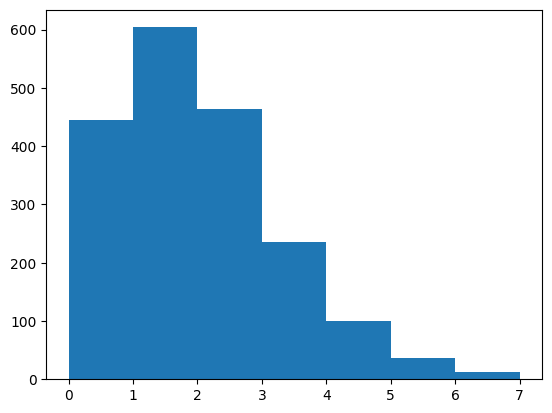

In [48]:
plt.hist(games["FTHG"], range(8))
plt.show()

The distribution of the total number of goals shows that games with 2 goals are the most common,

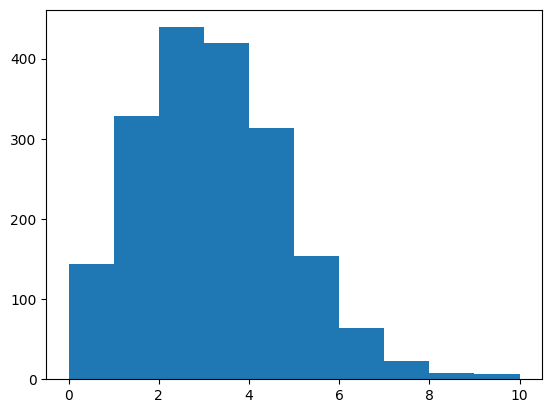

In [30]:
plt.hist(games["FTHG"] + games["FTAG"], range(11))
plt.show()

More interestingly we can use a 2-D histogram to compare frequencies of pairs of values, e.g. home goals and away goals.

We could do this directly with `plt.hist2d` but in the example below we pass the output of hist2d to another plotting package called `seaborn` which can make slight nicer figures,

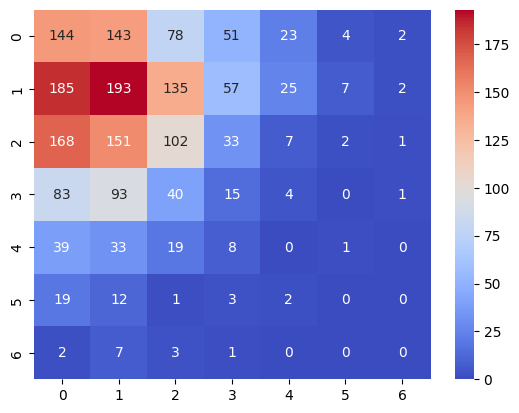

In [31]:
[h, x, y, i] = plt.hist2d(games["FTHG"], games["FTAG"], range(8))
seaborn.heatmap(h.astype("int"), annot=True, fmt="d", cmap="coolwarm")
plt.show()

The plot above shows the 1-1 is the most common score. The lack of symetry down the diagonal demonstrates the home team advantage, i.e., 185 games are 1-0 compared to only 143 that are 0-1, etc.

In the plot below we look at the distribution of home fouls against away fouls. If we look closely we can see that the home team commits more fouls than the away team.

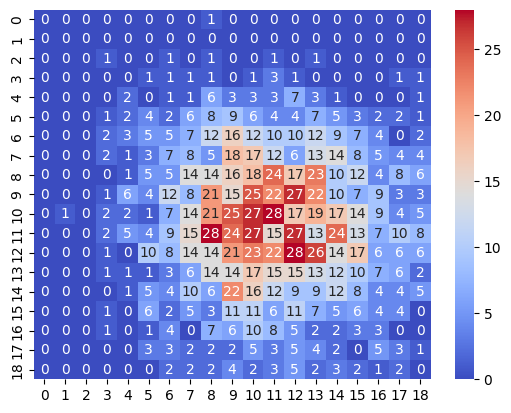

In [32]:
[h, x, y, i] = plt.hist2d(games["HF"], games["AF"], range(20))
seaborn.heatmap(h.astype("int"), annot=True, fmt="d", cmap="coolwarm")
plt.show()

We can also look and home vs away yellow cards...

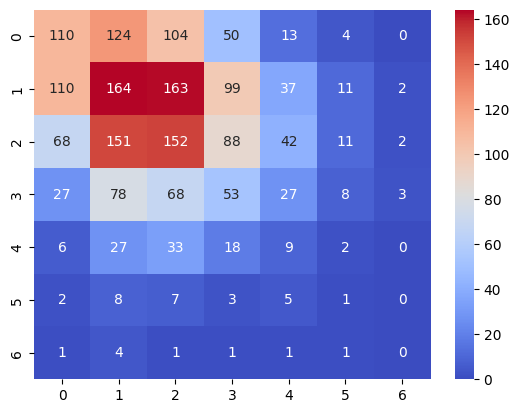

In [33]:
[h, x, y, i] = plt.hist2d(games["HY"], games["AY"], range(8))
seaborn.heatmap(h.astype("int"), annot=True, fmt="d", cmap="coolwarm")
plt.show()

In [34]:
sum(games["HY"]), sum(games["AY"])

(2974, 3326)

In [35]:
print("yellow cards: home ", sum(games["HY"]), "vs. away ", sum(games["AY"]))
print("fouls cards: home ", sum(games["HF"]), "vs. away ", sum(games["AF"]))

yellow cards: home  2974 vs. away  3326
fouls cards: home  20040 vs. away  21035


What causes this discrepancy? There are many possible reaosons, including, i) teams are fouling more often when playing away because they are more often behind, ii) teams are fouling the same amount home and away but there a bias in refereeing such that decisions more often go against the away team?

**Can you think of ways in which you could analyse the data to try find evidence to support or reject these two explanations?**

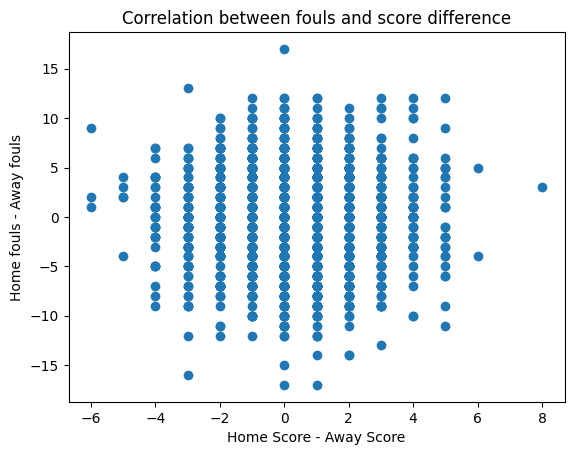

In [36]:
# Calculate the score difference for each game
games["score_diff"] = games["FTHG"] - games["FTAG"]

# Check if there is a correlation between fouls and score difference
home_fouls = games["HF"]
away_fouls = games["AF"]
score_diff = games["score_diff"]

# Plot the correlation between fouls and score difference
plt.scatter(score_diff, home_fouls - away_fouls)
plt.xlabel("Home Score - Away Score")
plt.ylabel("Home fouls - Away fouls")
plt.title("Correlation between fouls and score difference")
plt.show()
